In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R
texas <- read.csv("texas_socioeconomic_hiv_combined.csv")

In [4]:
%%R
library(dplyr)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
%%R
head(texas)

  GEOID                    NAME moe asian_alone associates bachelors
1 48001  Anderson County, Texas  16         321       2980      2870
2 48003   Andrews County, Texas  21          65        623       814
3 48005  Angelina County, Texas   9         975       4449      6413
4 48007   Aransas County, Texas  25         489       1337      2423
5 48009    Archer County, Texas  19          15        461       995
6 48011 Armstrong County, Texas   3           0        155       226
  below_poverty black_alone doctorate hispanic hs_graduate labor_force
1          6598       12124       226    10283       11407       19868
2          1647         122        30    10151        3020        8484
3         15026       12890       242    19326       14330       39169
4          5127         354       176     6721        4130       10606
5          1033          83        47      722        1900        4577
6           174           5         2      149         270         901
  land_area less_tha

In [6]:
%%R
names(texas)

 [1] "GEOID"              "NAME"               "moe"               
 [4] "asian_alone"        "associates"         "bachelors"         
 [7] "below_poverty"      "black_alone"        "doctorate"         
[10] "hispanic"           "hs_graduate"        "labor_force"       
[13] "land_area"          "less_than_9th"      "masters"           
[16] "native_american"    "other_race"         "pacific_islander"  
[19] "professional"       "some_college"       "some_hs"           
[22] "total_25_plus"      "total_pop_ins"      "total_population"  
[25] "total_poverty"      "two_or_more"        "unemployed"        
[28] "uninsured"          "white_alone"        "population_density"
[31] "land_area_sqmi"     "County"             "hiv_cases"         
[34] "hiv_rate"          


In [7]:
%%R
model1 <- lm(hiv_rate ~ population_density, data = texas)
summary(model1)


Call:
lm(formula = hiv_rate ~ population_density, data = texas)

Residuals:
    Min      1Q  Median      3Q     Max 
-218.96 -104.96  -57.31   18.01 3011.91 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        217.99377   19.53719  11.158  < 2e-16 ***
population_density   0.14805    0.04897   3.023  0.00281 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 267.9 on 212 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.04133,	Adjusted R-squared:  0.03681 
F-statistic: 9.139 on 1 and 212 DF,  p-value: 0.00281



In [8]:
%%R
head(texas[c("County", "hiv_cases", "hiv_rate")])
summary(texas$hiv_rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   179.0   238.6   254.5  3230.0      40 


In [9]:
%%R
model1 <- lm(hiv_rate ~ population_density, data = texas)
summary(model1)


Call:
lm(formula = hiv_rate ~ population_density, data = texas)

Residuals:
    Min      1Q  Median      3Q     Max 
-218.96 -104.96  -57.31   18.01 3011.91 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        217.99377   19.53719  11.158  < 2e-16 ***
population_density   0.14805    0.04897   3.023  0.00281 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 267.9 on 212 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.04133,	Adjusted R-squared:  0.03681 
F-statistic: 9.139 on 1 and 212 DF,  p-value: 0.00281



In [10]:
%%R
texas <- texas %>%
  mutate(unemployment_rate = unemployed / labor_force)

In [11]:
%%R
model3 <- lm(hiv_rate ~ unemployment_rate, data = texas)
summary(model3)



Call:
lm(formula = hiv_rate ~ unemployment_rate, data = texas)

Residuals:
    Min      1Q  Median      3Q     Max 
-241.58 -114.10  -57.91   15.31 2989.30 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         242.60      46.39   5.229 4.07e-07 ***
unemployment_rate   -75.17     791.42  -0.095    0.924    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 273.6 on 212 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  4.256e-05,	Adjusted R-squared:  -0.004674 
F-statistic: 0.009022 on 1 and 212 DF,  p-value: 0.9244



In [12]:
%%R
texas <- texas %>%
  mutate(
    black_prop = black_alone / total_population,
    hispanic_prop = hispanic / total_population,
    white_prop = white_alone / total_population
  )

model5 <- lm(hiv_rate ~ black_prop + hispanic_prop + white_prop, data = texas)
summary(model5)


Call:
lm(formula = hiv_rate ~ black_prop + hispanic_prop + white_prop, 
    data = texas)

Residuals:
    Min      1Q  Median      3Q     Max 
-248.11 -100.51  -48.74    6.97 3091.02 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)      71.17     292.10   0.244   0.8077  
black_prop     1034.65     453.45   2.282   0.0235 *
hispanic_prop   157.84      87.95   1.795   0.0742 .
white_prop       47.34     305.86   0.155   0.8771  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 267.8 on 210 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.05138,	Adjusted R-squared:  0.03783 
F-statistic: 3.792 on 3 and 210 DF,  p-value: 0.01118



In [13]:
%%R
texas <- texas %>%
  mutate(uninsured_rate = uninsured / total_pop_ins)

In [14]:
%%R
model4 <- lm(hiv_rate ~ uninsured_rate, data = texas)
summary(model4)


Call:
lm(formula = hiv_rate ~ uninsured_rate, data = texas)

Residuals:
    Min      1Q  Median      3Q     Max 
-254.42 -116.45  -62.04   17.19 2968.62 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      261.38      58.04   4.503  1.1e-05 ***
uninsured_rate  -380.36     916.37  -0.415    0.679    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 273.5 on 212 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.000812,	Adjusted R-squared:  -0.003901 
F-statistic: 0.1723 on 1 and 212 DF,  p-value: 0.6785



In [15]:
%%R
texas <- texas %>%
  mutate(unemployment_rate = unemployed / labor_force)

model3 <- lm(hiv_rate ~ unemployment_rate, data = texas)
summary(model3)


Call:
lm(formula = hiv_rate ~ unemployment_rate, data = texas)

Residuals:
    Min      1Q  Median      3Q     Max 
-241.58 -114.10  -57.91   15.31 2989.30 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         242.60      46.39   5.229 4.07e-07 ***
unemployment_rate   -75.17     791.42  -0.095    0.924    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 273.6 on 212 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  4.256e-05,	Adjusted R-squared:  -0.004674 
F-statistic: 0.009022 on 1 and 212 DF,  p-value: 0.9244



In [16]:
%%R
model1 <- lm(hiv_rate ~ population_density, data = texas)
summary(model1)


Call:
lm(formula = hiv_rate ~ population_density, data = texas)

Residuals:
    Min      1Q  Median      3Q     Max 
-218.96 -104.96  -57.31   18.01 3011.91 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        217.99377   19.53719  11.158  < 2e-16 ***
population_density   0.14805    0.04897   3.023  0.00281 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 267.9 on 212 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.04133,	Adjusted R-squared:  0.03681 
F-statistic: 9.139 on 1 and 212 DF,  p-value: 0.00281



In [17]:
%%R
texas <- texas %>%
  mutate(
    lower_education_prop = (less_than_9th + some_hs) / total_25_plus,
    poverty_rate = below_poverty / total_poverty
  )

In [18]:
%%R
model_multi <- lm(hiv_rate ~ poverty_rate + lower_education_prop + population_density, data = texas)
summary(model_multi)



Call:
lm(formula = hiv_rate ~ poverty_rate + lower_education_prop + 
    population_density, data = texas)

Residuals:
    Min      1Q  Median      3Q     Max 
-258.41 -102.08  -54.65   16.44 3029.33 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.989e+02  5.424e+01   3.667 0.000311 ***
poverty_rate         6.537e+01  3.070e+02   0.213 0.831598    
lower_education_prop 1.803e+04  1.658e+04   1.088 0.277996    
population_density   1.494e-01  4.937e-02   3.026 0.002784 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 268.4 on 210 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.04686,	Adjusted R-squared:  0.03324 
F-statistic: 3.441 on 3 and 210 DF,  p-value: 0.01772



`geom_smooth()` using formula = 'y ~ x'


In addition: Warning messages:
1: Removed 40 rows containing non-finite outside the scale range
(`stat_smooth()`). 
2: Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`). 


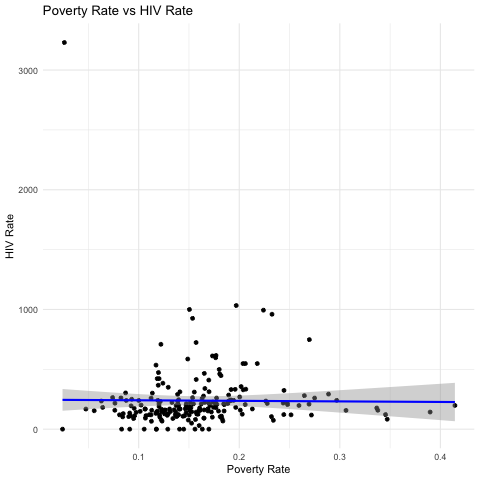

In [19]:
%%R
p1 <- ggplot(texas, aes(x = poverty_rate, y = hiv_rate)) +
  geom_point() +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Poverty Rate vs HIV Rate",
       x = "Poverty Rate",
       y = "HIV Rate") +
  theme_minimal()
print(p1)

`geom_smooth()` using formula = 'y ~ x'


In addition: Warning messages:
1: Removed 40 rows containing non-finite outside the scale range
(`stat_smooth()`). 
2: Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`). 


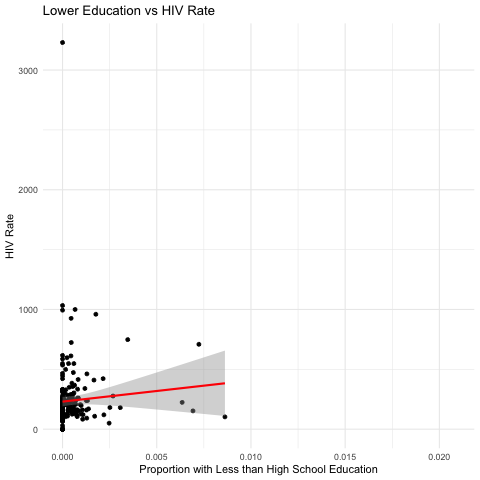

In [20]:
%%R
p2 <- ggplot(texas, aes(x = lower_education_prop, y = hiv_rate)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Lower Education vs HIV Rate",
       x = "Proportion with Less than High School Education",
       y = "HIV Rate") +
  theme_minimal()
print(p2)

`geom_smooth()` using formula = 'y ~ x'


In addition: Warning messages:
1: Removed 40 rows containing non-finite outside the scale range
(`stat_smooth()`). 
2: Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`). 


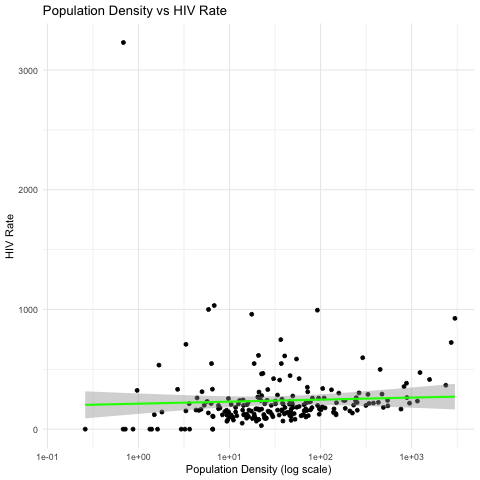

In [21]:
%%R
p3 <- ggplot(texas, aes(x = population_density, y = hiv_rate)) +
  geom_point() +
  geom_smooth(method = "lm", color = "green") +
  scale_x_log10() +
  labs(title = "Population Density vs HIV Rate",
       x = "Population Density (log scale)",
       y = "HIV Rate") +
  theme_minimal()
print(p3)

In [29]:
%%R 


na_only <- texas %>% 
    filter(is.na(hiv_rate))

write.csv(na_only, 'na_only.csv')

In [30]:
na_only = pd.read_csv('na_only.csv')
na_only

,Unnamed: 0,GEOID,NAME,moe,asian_alone,associates,bachelors,below_poverty,black_alone,doctorate,hispanic,hs_graduate,labor_force,land_area,less_than_9th,masters,native_american,other_race,pacific_islander,professional,some_college,some_hs,total_25_plus,total_pop_ins,total_population,total_poverty,two_or_more,unemployed,uninsured,white_alone,population_density,land_area_sqmi,County,hiv_cases,hiv_rate,unemployment_rate,black_prop,hispanic_prop,white_prop,uninsured_rate,lower_education_prop,poverty_rate,prediction,residuals,residualz


In [23]:
%%R
texas <- na.omit(texas)

In [24]:
%%R 
nrow(texas)

[1] 214


In [25]:
%%R
model_race_density <- lm(hiv_rate ~ black_prop + hispanic_prop + I(population_density**2), data = texas)
summary(model_race_density)


Call:
lm(formula = hiv_rate ~ black_prop + hispanic_prop + I(population_density^2), 
    data = texas)

Residuals:
    Min      1Q  Median      3Q     Max 
-246.29  -90.66  -51.41   11.18 3081.04 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)             1.318e+02  4.621e+01   2.852  0.00478 **
black_prop              7.841e+02  3.008e+02   2.607  0.00979 **
hispanic_prop           1.254e+02  8.532e+01   1.469  0.14325   
I(population_density^2) 5.091e-05  2.074e-05   2.455  0.01491 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 264 on 210 degrees of freedom
Multiple R-squared:  0.07774,	Adjusted R-squared:  0.06457 
F-statistic: 5.901 on 3 and 210 DF,  p-value: 0.0006951



In [26]:
%%R 
texas <- texas%>%mutate(
    prediction = predict(model_race_density),
    residuals=resid(model_race_density),
    residualz=scale(residuals)) %>%
    arrange(residuals)


texas %>% write.csv('texas.csv')

In [27]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('texas.csv')
df['actual'] = df['hiv_rate']
df

,Unnamed: 0,GEOID,NAME,moe,asian_alone,associates,bachelors,below_poverty,black_alone,doctorate,hispanic,hs_graduate,labor_force,land_area,less_than_9th,masters,native_american,other_race,pacific_islander,professional,some_college,some_hs,total_25_plus,total_pop_ins,total_population,total_poverty,two_or_more,unemployed,uninsured,white_alone,population_density,land_area_sqmi,County,hiv_cases,hiv_rate,unemployment_rate,black_prop,hispanic_prop,white_prop,uninsured_rate,lower_education_prop,poverty_rate,prediction,residuals,residualz,actual
0,1,48461,"Upton County, Texas",4,26,98,151,505,220,0,1966,886,1506,3659,0,76,21,1741,0,7,115,0,2430,3602,3659,3591,3,78,98,1648,2.947663,1241.322532,Upton,0,0,0.051793,0.060126,0.537305,0.450396,0.027207,0.000000,0.140629,246.285463,-246.285463,-0.939497,0
1,2,48087,"Collingsworth County, Texas",7,0,135,334,493,273,6,854,454,1439,2969,0,54,62,258,0,4,56,0,1966,2904,2969,2904,93,128,177,2283,3.232654,918.440482,Collingsworth,0,0,0.088951,0.091950,0.287639,0.768946,0.060950,0.000000,0.169766,239.939620,-239.939620,-0.915290,0
2,3,48123,"DeWitt County, Texas",5,4,945,1318,2946,1900,90,7192,4426,8352,20340,0,324,242,4788,0,79,1199,0,14385,18413,20340,18395,247,598,829,13159,22.376820,908.976345,DeWitt,5,30,0.071600,0.093412,0.353589,0.646952,0.045023,0.000000,0.160152,249.378408,-219.378408,-0.836856,30
3,4,48439,"Tarrant County, Texas",144,111274,99985,284540,241703,338378,14114,590485,264085,1069433,2049770,323,106042,10343,146177,3946,19371,50795,519,1314012,2033815,2049770,2023452,65470,50049,119050,1374182,2373.358721,863.657896,Tarrant,6407,367,0.046800,0.165081,0.288074,0.670408,0.058535,0.000641,0.119451,584.099541,-217.099541,-0.828163,367
4,5,48473,"Waller County, Texas",29,530,1497,4218,7827,12911,162,15581,8231,24732,51832,30,1442,449,7016,25,212,1066,0,28580,51619,51832,47386,805,1288,4510,30096,100.986404,513.257211,Waller,80,161,0.052078,0.249093,0.300606,0.580645,0.087371,0.001050,0.165175,365.295805,-204.295805,-0.779321,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,48471,"Walker County, Texas",20,920,2487,6700,12325,16780,599,12973,11799,27203,72321,0,2071,315,462,14,331,6775,0,46597,58240,72321,55013,1030,904,3872,52800,92.220095,784.221706,Walker,694,994,0.033232,0.232021,0.179381,0.730078,0.066484,0.000000,0.224038,336.626762,657.373238,2.507660,994
210,211,48163,"Frio County, Texas",21,170,962,481,3618,718,116,15753,3289,7112,19871,0,253,27,2250,0,57,963,22,12449,15664,19871,15557,364,478,1288,16342,17.530645,1133.500766,Frio,148,960,0.067210,0.036133,0.792763,0.822405,0.082227,0.001767,0.232564,259.513359,700.486641,2.672123,960
211,212,48389,"Reeves County, Texas",10,204,646,915,2033,446,34,11571,2751,6496,15492,7,279,8,2682,21,63,682,0,10500,13635,15492,13512,117,583,1185,12014,5.878528,2635.353534,Reeves,121,1000,0.089748,0.028789,0.746902,0.775497,0.086909,0.000667,0.150459,247.991905,752.008095,2.868661,1000
212,213,48169,"Garza County, Texas",6,119,94,453,829,347,8,3170,1076,1991,6070,0,161,16,387,0,4,213,0,4509,4208,6070,4208,81,51,276,5120,6.794165,893.413689,Garza,54,1033,0.025615,0.057166,0.522241,0.843493,0.065589,0.000000,0.197006,242.078490,790.921510,3.017102,1033
